In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# generate training data of 24 shades of colors
colors =np.array([[0,0,205],[255,20,147],[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255],
         [0,128,128],[60,179,113],[255,99,71],[255,99,71],[0,255,127],[0,0,128],[255,165,0],[135,206,235],[255,192,203],
         [255,105,180],[255,140,0],[250,128,114],[50,205,50],[138,43,226],[255,215,0],[177,255,212],[173,255,47]])

color_names = ['medium blue', 'deep pink', 'red', 'lime','blue','yellow','aqua','magenta'
         'teal', 'medium sea green', 'tomato', 'spring green','navy','orange','sky blue','pink'
         'hot pink', 'dark orange', 'salmon', 'lime green','blue violet', 'gold', 'aqua marine','green yellow']

# normalize to [0,1]
colors = colors/255
n = np.random.randint(0,256)

In [3]:
# randomly initialized weights
map_size = 100
weights = np.empty([map_size*map_size,3]) 

# randomly initialized weights
for i in range(0,map_size*map_size):
    weights[i][0] = np.random.randint(0,256)/255
    weights[i][1] = np.random.randint(0,256)/255
    weights[i][2] = np.random.randint(0,256)/255

In [17]:
weights.shape

(10000, 3)

In [4]:
# initialize 100*100 output grid
grid = np.zeros((map_size*map_size,2))
k=0
for i in range(map_size):
  for j in range(map_size):
      grid[k,:] = [i,j]
      k = k+1

In [5]:
# define functions to calculate the distance
def distance(x, weights):
  dist = []
  for w in weights:
    d = np.linalg.norm(x-w)
    dist.append(d)
  return np.array(dist)

# define functions to find the winner and update weights for winners and their neighbourhood
def get_winner(x,w):
  dist = distance(x,weights) 
  winner_index = dist.argmin()
  return winner_index

def update_weights(lr,sigma,x,w):
    weights_new = np.empty([map_size*map_size,3])
    i = get_winner(x, w)   
    d1 = np.ceil(i / map_size)
    d2 = np.mod(i , map_size)
    d = distance(np.array([d1, d2]), grid)     
    s = np.argmin(d)

    for j in range(0,len(weights)):
      h = np.exp(-d[j]*d[j]/(2 * sigma **2))
      #print(h)     
      weights[j] = w[j] + lr*h * (x - w[j])
    return weights

# define functions following the learning rate and sigma changing rules
def learning_rate_decay(k,T,lr_0):
  return lr_0* np.exp(-k/T)

def sigma_decay(k,T,sigma_0):
  return sigma_0*np.exp(-k/T)


The following code blocks are  for different sigma_0 values, please read the comments noted as  "change sigma_0 here"  to to replicate the output.

In [6]:
T = 1000
lr_0 = 0.8
lr = lr_0

### change sigma_0 here ###
sigma_0 = 1
sigma = sigma_0
saved_weights = []

for n in range(0,T):
  i = np.random.randint(0,24)
  weights = update_weights(lr,sigma,colors[i],weights)
  lr = learning_rate_decay(n,T,lr_0)
  sigma = sigma_decay(n,T,sigma_0)
  if (n==19):
    w_20 = weights.copy()
  if (n==39):
    w_40 = weights.copy()
  if (n==99):
    w_100 = weights.copy()
  if (n==999):
    w_1000 = weights.copy()

sigma_0=1


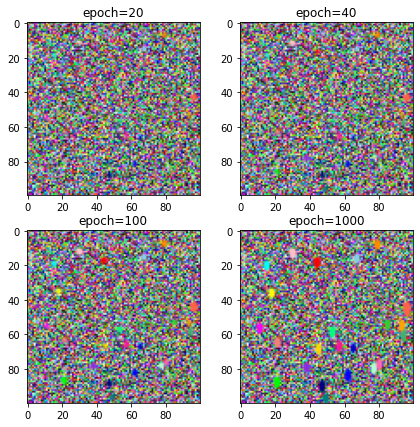

In [7]:
# Plot
w_20 = w_20.reshape(100,100,3)
w_40 = w_40.reshape(100,100,3)
w_100 = w_100.reshape(100,100,3)
w_1000 = w_1000.reshape(100,100,3)

print('sigma_0=1')
plt.figure(figsize=(7, 7))

plt.subplot(221)

plt.title('epoch=20')
plt.imshow(w_20)
plt.subplot(222)
plt.title('epoch=40')
plt.imshow(w_40)
plt.subplot(223)
plt.title('epoch=100')
plt.imshow(w_100)
plt.subplot(224)
plt.title('epoch=1000')
plt.imshow(w_1000)

In [8]:

T = 1000
lr_0 = 0.8
lr = lr_0

### change sigma_0 here ###
sigma_0 = 10
sigma = sigma_0
saved_weights = []

for n in range(0,T):
  i = np.random.randint(0,24)
  weights = update_weights(lr,sigma,colors[i],weights)
  lr = learning_rate_decay(n,T,lr_0)
  sigma = sigma_decay(n,T,sigma_0)
  if (n==19):
    w_20 = weights.copy()
  if (n==39):
    w_40 = weights.copy()
  if (n==99):
    w_100 = weights.copy()
  if (n==999):
    w_1000 = weights.copy()



sigma_0=10


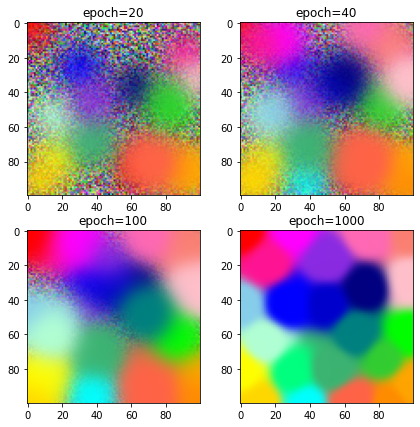

In [9]:
# Plot
w_20 = w_20.reshape(100,100,3)
w_40 = w_40.reshape(100,100,3)
w_100 = w_100.reshape(100,100,3)
w_1000 = w_1000.reshape(100,100,3)

print('sigma_0=10')
plt.figure(figsize=(7, 7))
plt.title('sigma=1')
plt.subplot(221)

plt.title('epoch=20')
plt.imshow(w_20)
plt.subplot(222)
plt.title('epoch=40')
plt.imshow(w_40)
plt.subplot(223)
plt.title('epoch=100')
plt.imshow(w_100)
plt.subplot(224)
plt.title('epoch=1000')
plt.imshow(w_1000)

In [10]:

T = 1000
lr_0 = 0.8
lr = lr_0

### change sigma_0 here ###
sigma_0 = 30
sigma = sigma_0
saved_weights = []

for n in range(0,T):
  i = np.random.randint(0,24)
  weights = update_weights(lr,sigma,colors[i],weights)
  lr = learning_rate_decay(n,T,lr_0)
  sigma = sigma_decay(n,T,sigma_0)
  if (n==19):
    w_20 = weights.copy()
  if (n==39):
    w_40 = weights.copy()
  if (n==99):
    w_100 = weights.copy()
  if (n==999):
    w_1000 = weights.copy()



sigma_0=0


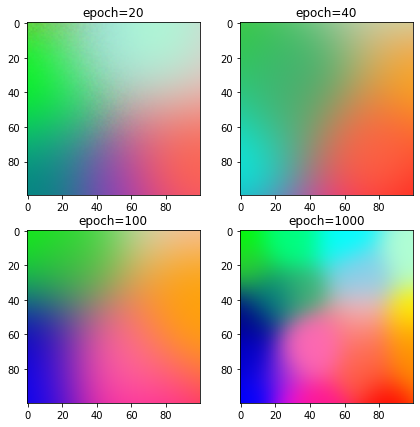

In [11]:
# Plot
w_20 = w_20.reshape(100,100,3)
w_40 = w_40.reshape(100,100,3)
w_100 = w_100.reshape(100,100,3)
w_1000 = w_1000.reshape(100,100,3)

print('sigma_0=0')
plt.figure(figsize=(7, 7))
plt.title('sigma=1')
plt.subplot(221)

plt.title('epoch=20')
plt.imshow(w_20)
plt.subplot(222)
plt.title('epoch=40')
plt.imshow(w_40)
plt.subplot(223)
plt.title('epoch=100')
plt.imshow(w_100)
plt.subplot(224)
plt.title('epoch=1000')
plt.imshow(w_1000)

In [12]:
    
T = 1000
lr_0 = 0.8
lr = lr_0

### change sigma_0 here ###
sigma_0 = 50
sigma = sigma_0

for n in range(0,1000):
  i = np.random.randint(0,24)
  weights = update_weights(lr,sigma,colors[i],weights)
  lr = learning_rate_decay(n,T,lr_0)
  sigma = sigma_decay(n,T,sigma_0)
  if (n==19):
    w_20 = weights.copy()
  if (n==39):
    w_40 = weights.copy()
  if (n==99):
    w_100 = weights.copy()
  if (n==999):
    w_1000 = weights.copy()

sigma_0=50


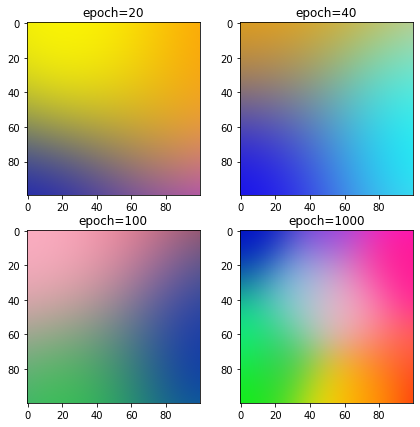

In [13]:
# Plot
w_20 = w_20.reshape(100,100,3)
w_40 = w_40.reshape(100,100,3)
w_100 = w_100.reshape(100,100,3)
w_1000 = w_1000.reshape(100,100,3)

print('sigma_0=50')
plt.figure(figsize=(7, 7))
plt.title('sigma=1')
plt.subplot(221)

plt.title('epoch=20')
plt.imshow(w_20)
plt.subplot(222)
plt.title('epoch=40')
plt.imshow(w_40)
plt.subplot(223)
plt.title('epoch=100')
plt.imshow(w_100)
plt.subplot(224)
plt.title('epoch=1000')
plt.imshow(w_1000)

In [14]:

T = 1000
lr_0 = 0.8
lr = lr_0

### change sigma_0 here ###
sigma_0 = 70
sigma = sigma_0
saved_weights = []
for n in range(0,1000):
  i = np.random.randint(0,24)
  weights = update_weights(lr,sigma,colors[i],weights)
  lr = learning_rate_decay(n,T,lr_0)
  sigma = sigma_decay(n,T,sigma_0)
  if (n==19):
    w_20 = weights.copy()
  if (n==39):
    w_40 = weights.copy()
  if (n==99):
    w_100 = weights.copy()
  if (n==999):
    w_1000 = weights.copy()


sigma_0=70


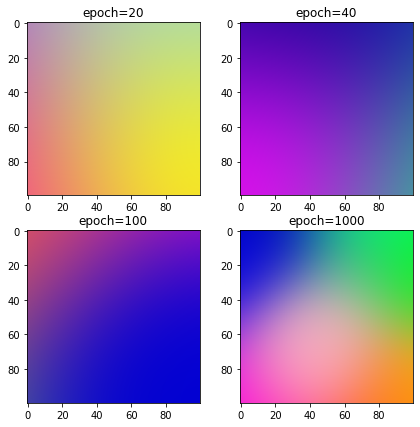

In [15]:
# Plot
w_20 = w_20.reshape(100,100,3)
w_40 = w_40.reshape(100,100,3)
w_100 = w_100.reshape(100,100,3)
w_1000 = w_1000.reshape(100,100,3)

print('sigma_0=70')
plt.figure(figsize=(7, 7))
plt.title('sigma=1')
plt.subplot(221)

plt.title('epoch=20')
plt.imshow(w_20)
plt.subplot(222)
plt.title('epoch=40')
plt.imshow(w_40)
plt.subplot(223)
plt.title('epoch=100')
plt.imshow(w_100)
plt.subplot(224)
plt.title('epoch=1000')
plt.imshow(w_1000)

**Analysis:**
